In [1]:
# Image compression by SVD
# 2017,2018 Tsuyoshi Okubo
# 2019 modified by Tsuyoshi Okubo
# 2020 modified by TO

By using the low rank approximation through SVD, perform data compression of a gray scale image. 

You can change sample image by modifying file open "sample.jpg".

Also, you can set the rank of approximation by varying "chi".

Let's see, how the image changes when you change the rank.

In [2]:
## import libraries
from PIL import Image ## Python Imaging Library
import numpy as np ## numpy
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
## Rank for low rank approximation
chi = 10 

In [4]:
img = Image.open("./sample.jpg") ## load image
img_gray = img.convert("L") ## convert to grayscale
#img_gray.show(title="Original") ## show image in external window
img_gray.save("./gray.png") ## save grayscale image
#img_gray.save("./gray.jpg") ## save grayscale image in jpg

In [5]:
array = np.array(img_gray,dtype=float) ## convert to ndarray
print("Array shape:" +repr(array.shape)) ## print array shape

Array shape:(768, 1024)


In [6]:
u,s,vt = np.linalg.svd(array,full_matrices=False) ## svd 

In [7]:
#truncation
u = u[:,:chi]
vt = vt[:chi,:]
st = s[:chi]


In [8]:
array_truncated = np.dot(np.dot(u,np.diag(st)),vt) ## make truncated array
normalized_distance = np.sqrt(np.sum((array-array_truncated)**2))/np.sqrt(np.sum(array**2))
print("Low rank approximation with chi=" +repr(chi))
print("Normalized distance:" +repr(normalized_distance)) ## print normalized distance

Low rank approximation with chi=10
Normalized distance:0.1006018331988249


In [9]:
img_gray_truncated = Image.fromarray(np.uint8(np.clip(array_truncated,0,255))) ## convert to grayscale image


In [10]:
#img_gray_truncated.show(title="Truncated") ## show image in external window
img_gray_truncated.save("./gray_truncated.png") ## save compressed image
#img_gray_truncated.save("./gray_truncated.jpg") ## save compressed image in jpg

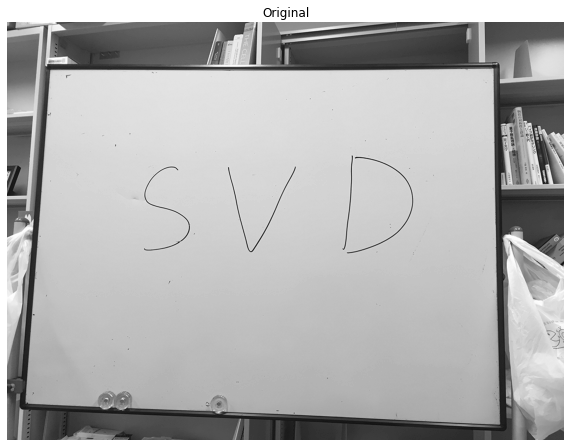

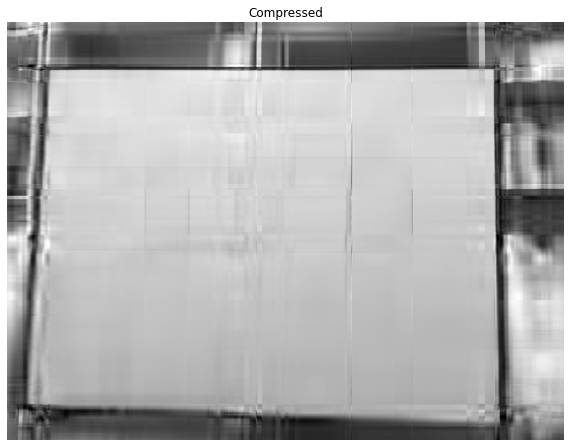

In [11]:
plt.figure(figsize=(array.shape[1]*0.01,array.shape[0]*0.01))
plt.axis("off")
plt.title("Original")
plt.imshow(img_gray,cmap='gray')

plt.figure(figsize=(array_truncated.shape[1]*0.01,array_truncated.shape[0]*0.01))
plt.axis("off")
plt.title("Compressed")
plt.imshow(img_gray_truncated,cmap='gray')

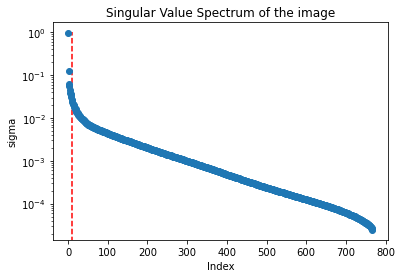

In [12]:
## normalization of singular values
s = s/np.sqrt(np.sum(s**2))

output_sv = len(s) ## number of singular values to output
plt.figure()
plt.title("Singular Value Spectrum of the image")
plt.plot(np.arange(output_sv),s[:output_sv],"o")
plt.vlines([chi],0,1,  "red", linestyles='dashed') ## position of chi
plt.xlabel("Index")
plt.ylabel("sigma")
plt.yscale("log")
plt.show()
